In [1]:
import matplotlib.pyplot as plt
import powerlaw

from load_graph import *

13477 real communities.
8287 abcdoo communities.
8615 cbk communities.


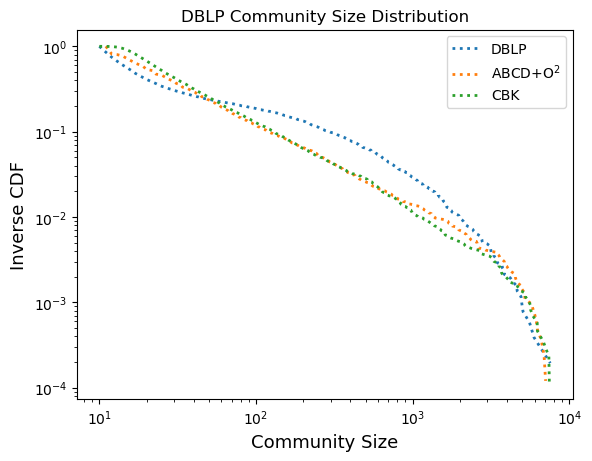

In [2]:
## DBLP graph
_, real = load_snap("data/com-dblp.ungraph.txt", "data/com-dblp.all.cmty.txt")
abcdoo, _ = load_coms("data/abcdoo_dblp_d2_com.dat", True)
cbk, _ = load_coms("data/dblp_cbk.dat", True)

print(f"{len(real)} real communities.")
print(f"{len(abcdoo)} abcdoo communities.")
print(f"{len(cbk)} cbk communities.")

options = [real, abcdoo, cbk]
names = ["DBLP", r"ABCD+O$^2$", "CBK"]
fig, ax = plt.subplots()
for coms, name in zip(options, names):
    X = powerlaw.Fit([len(x) for x in coms], xmin=10)
    #X.power_law.plot_ccdf(ax=ax, linestyle="-", label=name)
    X.plot_ccdf(ax=ax, linewidth=2, original_data=False, linestyle=":", label=name)

ax.set_title("DBLP Community Size Distribution")
ax.legend()
ax.set_xlabel("Community Size", fontsize=13)
ax.set_ylabel("Inverse CDF", fontsize=13);

75149 real communities.
16649 abcdoo communities.
4712 cbk communities.


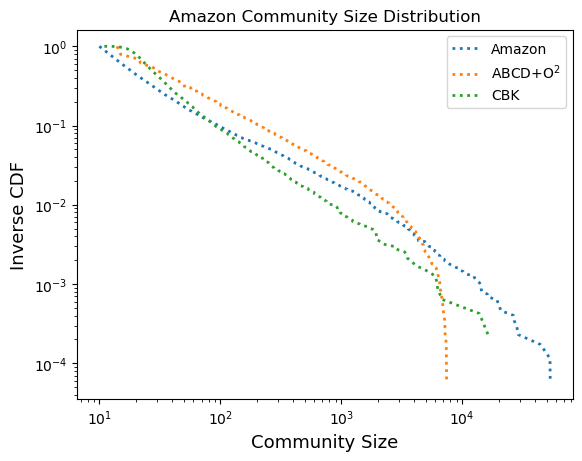

In [3]:
## Amazon graph
_, real = load_snap("data/com-amazon.ungraph.txt", "data/com-amazon.all.dedup.cmty.txt")
abcdoo, _ = load_coms("data/abcdoo_amazon_d2_com.dat", True)
cbk, _ = load_coms("data/amazon_cbk.dat", True)

print(f"{len(real)} real communities.")
print(f"{len(abcdoo)} abcdoo communities.")
print(f"{len(cbk)} cbk communities.")

options = [real, abcdoo, cbk]
names = ["Amazon", r"ABCD+O$^2$", "CBK"]
fig, ax = plt.subplots()
for coms, name in zip(options, names):
    X = powerlaw.Fit([len(x) for x in coms], xmin=10)
    #X.power_law.plot_ccdf(ax=ax, linestyle="-", label=name)
    X.plot_ccdf(ax=ax, linewidth=2, original_data=False, linestyle=":", label=name)

ax.set_title("Amazon Community Size Distribution")
ax.legend()
ax.set_xlabel("Community Size", fontsize=13)
ax.set_ylabel("Inverse CDF", fontsize=13);

16386 real communities.
2677 abcdoo communities.
1668 cbk communities.


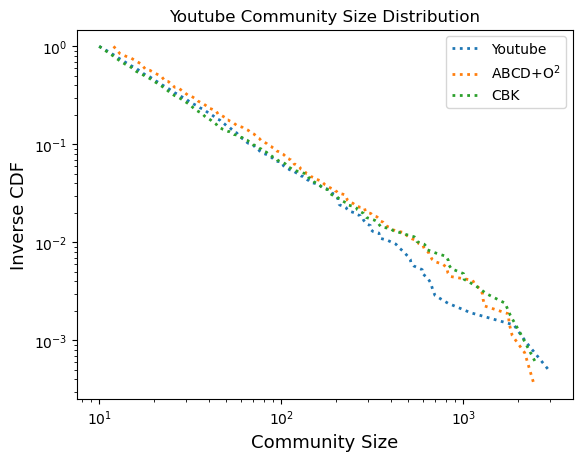

In [4]:
## Youtube graph
_, real = load_snap("data/com-youtube.ungraph.txt", "data/com-youtube.all.cmty.txt", drop_outliers=True)
abcdoo, _ = load_coms("data/abcdoo_youtube_d2_com.dat", False)
cbk, _ = load_coms("data/youtube_cbk.dat", False)

print(f"{len(real)} real communities.")
print(f"{len(abcdoo)} abcdoo communities.")
print(f"{len(cbk)} cbk communities.")

options = [real, abcdoo, cbk]
names = ["Youtube", r"ABCD+O$^2$", "CBK"]
fig, ax = plt.subplots()
for coms, name in zip(options, names):
    X = powerlaw.Fit([len(x) for x in coms], xmin=10)
    #X.power_law.plot_ccdf(ax=ax, linestyle="-", label=name)
    X.plot_ccdf(ax=ax, linewidth=2, original_data=False, linestyle=":", label=name)

ax.set_title("Youtube Community Size Distribution")
ax.legend()
ax.set_xlabel("Community Size", fontsize=13)
ax.set_ylabel("Inverse CDF", fontsize=13);